In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
# Prepare the data data
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

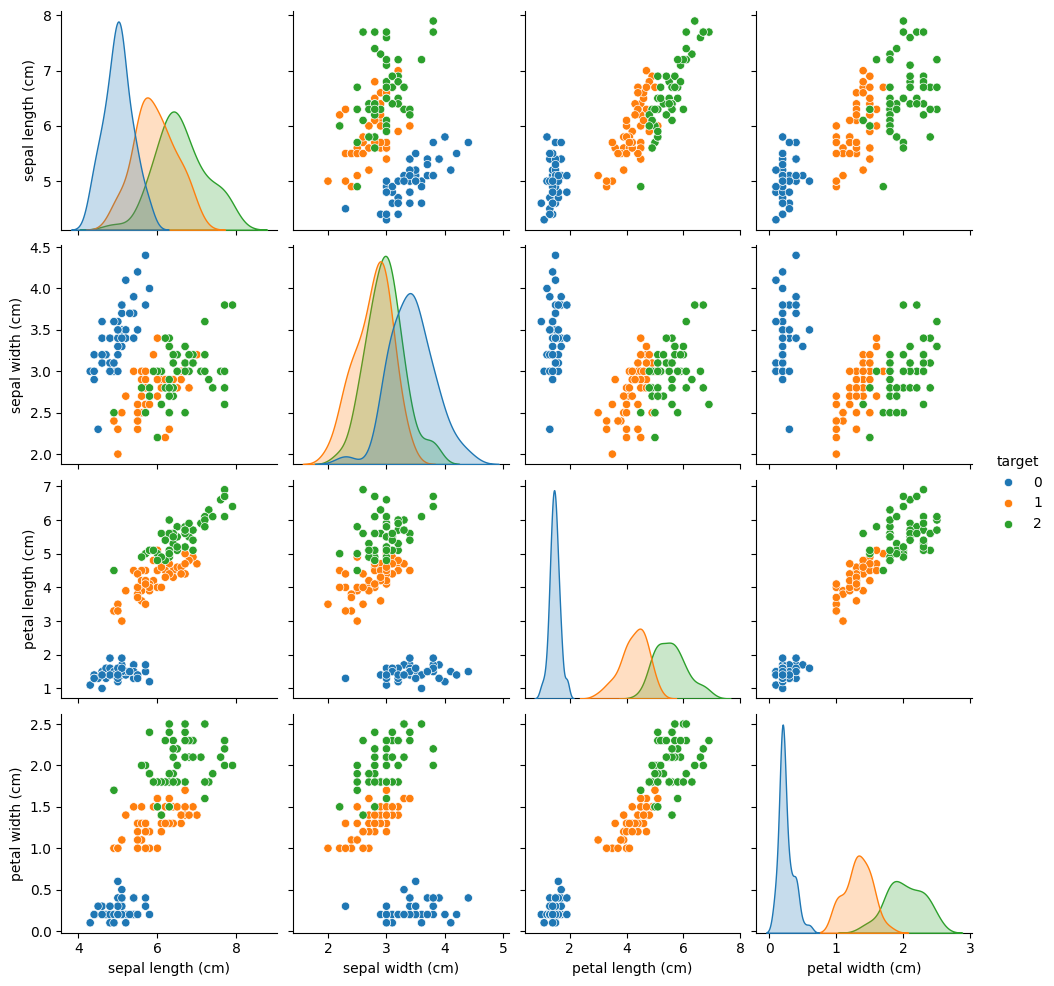

In [3]:
%matplotlib inline
sns.pairplot(iris.frame, hue='target',  palette='tab10')

In [4]:
clf = DecisionTreeClassifier(max_depth = 2,  random_state = 0)
model = clf.fit(X, y)
clf_pred = clf.predict(X)
clf_acc = accuracy_score(y, clf_pred)
print("%s accuracy %f" %  ("DecisionTreeClassifier" , clf_acc))
print(confusion_matrix(y, clf_pred))
print(classification_report(y, clf_pred))

DecisionTreeClassifier accuracy 0.960000
[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



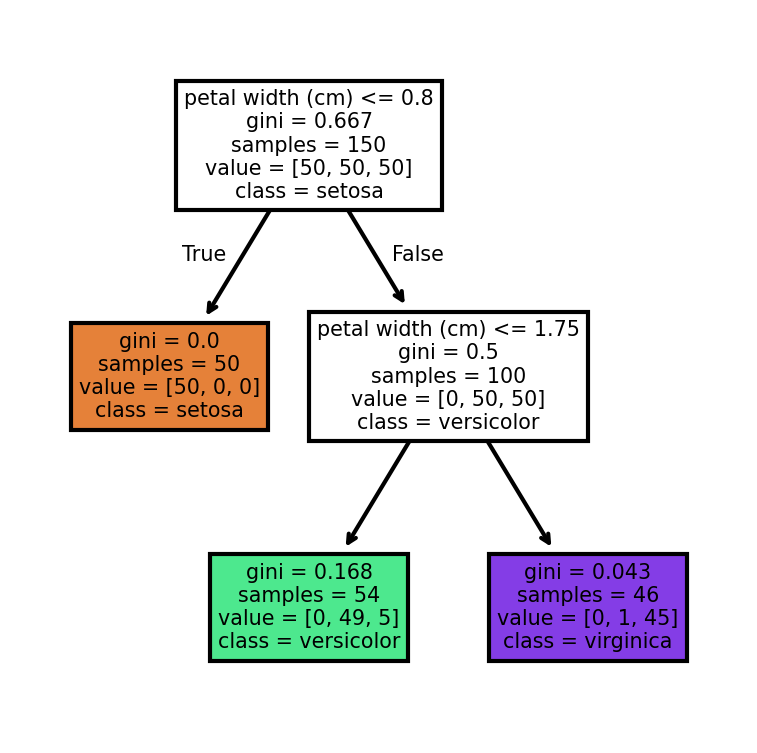

In [5]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
plot_tree(clf, feature_names = fn, class_names=cn, filled = True);

In [6]:
clf.feature_importances_

array([0., 0., 0., 1.])

In [7]:
clf.tree_.threshold

array([ 0.80000001, -2.        ,  1.75      , -2.        , -2.        ])

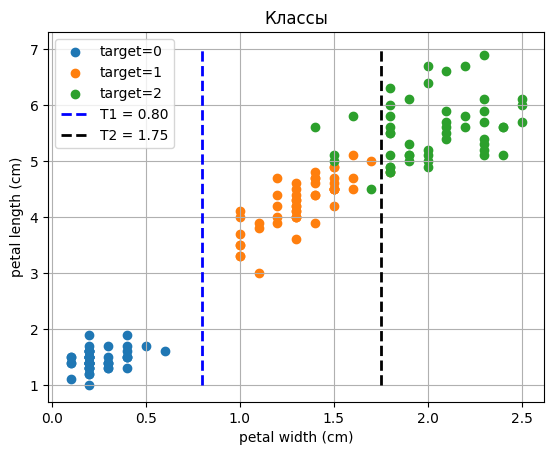

In [8]:
axes = plt.axes()
legend = []
plt.title('Классы')
x_lable='petal width (cm)'
y_lable='petal length (cm)'
axes.set_xlabel(x_lable)             
axes.set_ylabel(y_lable)  
for c, rows in iris.frame.groupby('target'):
    plt.scatter(rows[x_lable], rows[y_lable])
    legend.append("target=%s" % c)

t1=clf.tree_.threshold[0]
t2=clf.tree_.threshold[2]
    
plt.vlines(t1, 1, 7, color='blue', linewidth=2, linestyles='dashed')
legend.append("T1 = %.2f" % (t1))

plt.vlines(t2, 1, 7, color='black', linewidth=2, linestyles='dashed')
legend.append("T2 = %.2f" % (t2))


plt.legend(legend, loc="upper left")
plt.grid()
plt.show()

DecisionTreeClassifier accuracy 0.973333
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



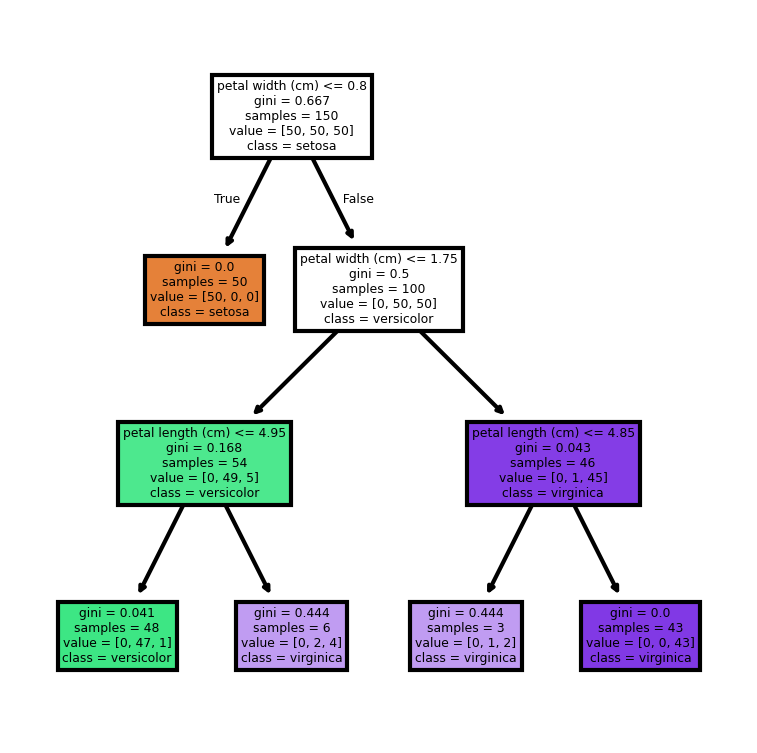

In [9]:
clf = DecisionTreeClassifier(max_depth = 3,  random_state = 0)
model = clf.fit(X, y)
clf_pred = clf.predict(X)
clf_acc = accuracy_score(y, clf_pred)
print("%s accuracy %f" %  ("DecisionTreeClassifier" , clf_acc))
print(confusion_matrix(y, clf_pred))
print(classification_report(y, clf_pred))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
plot_tree(clf, feature_names = fn, class_names=cn, filled = True);

In [10]:
clf.tree_.threshold

array([ 0.80000001, -2.        ,  1.75      ,  4.95000005, -2.        ,
       -2.        ,  4.85000014, -2.        , -2.        ])

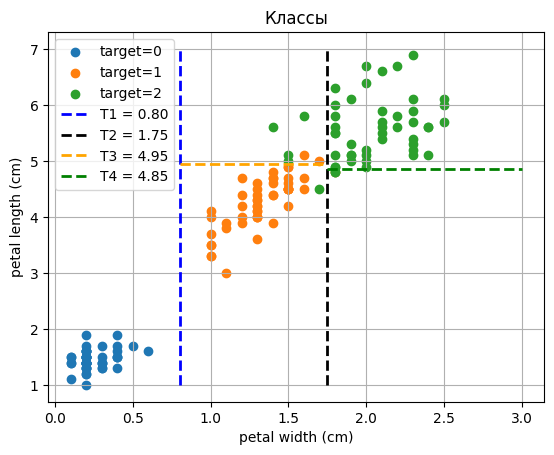

In [11]:
axes = plt.axes()
legend = []
plt.title('Классы')
x_lable='petal width (cm)'
y_lable='petal length (cm)'
axes.set_xlabel(x_lable)             
axes.set_ylabel(y_lable)  
for c, rows in iris.frame.groupby('target'):
    plt.scatter(rows[x_lable], rows[y_lable])
    legend.append("target=%s" % c)

t1=clf.tree_.threshold[0]
t2=clf.tree_.threshold[2]
t3=clf.tree_.threshold[3]
t4=clf.tree_.threshold[6]
    
plt.vlines(t1, 1, 7, color='blue', linewidth=2, linestyles='dashed')
legend.append("T1 = %.2f" % (t1))

plt.vlines(t2, 1, 7, color='black', linewidth=2, linestyles='dashed')
legend.append("T2 = %.2f" % (t2))

plt.hlines(t3, t1, t2, color='orange', linewidth=2, linestyles='dashed')
legend.append("T3 = %.2f" % (t3))

plt.hlines(t4, t2, 3, color='green', linewidth=2, linestyles='dashed')
legend.append("T4 = %.2f" % (t4))

plt.legend(legend, loc="upper left")
plt.grid()
plt.show()

In [12]:
#!pip install dtreeviz

In [13]:
import dtreeviz # remember to load the package

clf = DecisionTreeClassifier(max_depth = 6,  random_state = 0)
model = clf.fit(X, y)
clf_pred = clf.predict(X)
clf_acc = accuracy_score(y, clf_pred)
plt.figure(figsize=(180,8))

viz = dtreeviz.model(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz.view()

ModuleNotFoundError: No module named 'dtreeviz'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state = 333)
clf.fit(X, y)
clf_pred = clf.predict(X)
clf_acc = accuracy_score(y, clf_pred)
print("%s accuracy %f" %  ("DecisionTreeClassifier" , clf_acc))
print(confusion_matrix(y, clf_pred))
print(classification_report(y, clf_pred))

In [ ]:
plt.figure(figsize=(18,8))
for pic in range(1,7):
    ax = plt.subplot(2, 3, pic)
    plot_tree(clf.estimators_[pic], 
              feature_names=iris.feature_names,
              class_names=list(iris.target_names),
              filled = True);
plt.subplots_adjust(wspace=0.1, hspace=0.4) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
num_trees = list(range(2, 25))
depth = list(range(2, 5))
param_grid = dict(n_estimators=num_trees, max_depth=depth)
clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=3)
grid_search=grid.fit(X,y)

In [ ]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy is : {:.2f}%".format(accuracy) )

In [ ]:
from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
X.describe()